In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 


In [3]:
df = pd.read_csv('sales-4.csv')

In [4]:
df.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [5]:
df.columns.to_list()

['sale_id',
 'branch',
 'city',
 'customer_type',
 'gender',
 'product_name',
 'product_category',
 'unit_price',
 'quantity',
 'tax',
 'total_price',
 'reward_points']

In [6]:
df['total_sales'] = df['unit_price'] * df['quantity']
df['profit'] = df['total_sales'] - df['tax']


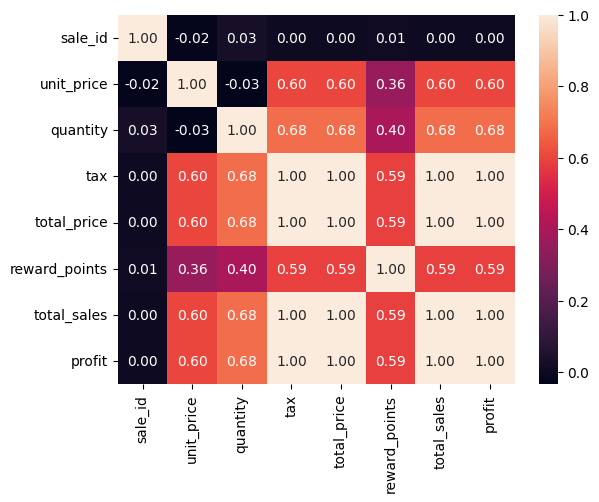

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

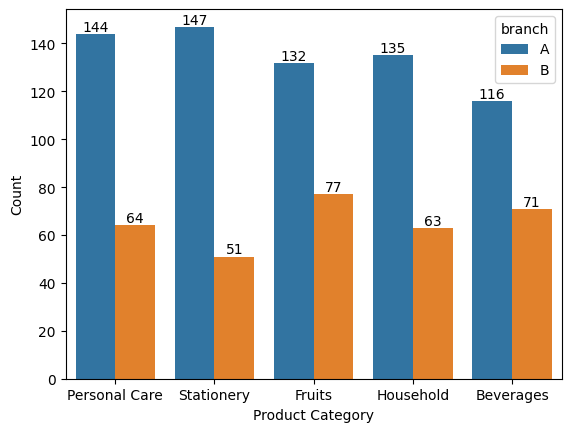

In [8]:
ax = sns.countplot(data = df, x='product_category',hue='branch')
for p in ax.containers:
    ax.bar_label(p,label_type='edge')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

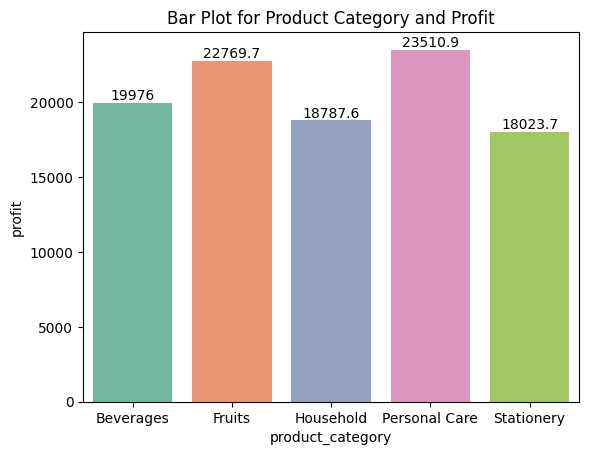

In [9]:
top_profits = df.groupby('product_category')['profit'].sum().reset_index()

ax = sns.barplot(data=top_profits, x='product_category', y='profit', hue='product_category', palette='Set2')
plt.title('Bar Plot for Product Category and Profit')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.show()

In [10]:
sales_by_gender_product = df.pivot_table(index = 'gender',columns='product_name',values='total_sales',aggfunc='count')

fig = px.bar(
    sales_by_gender_product,
    x=sales_by_gender_product.index,
    y=sales_by_gender_product.columns,
    title="Sales by Gender and Product Name",
    barmode='group',
    labels={'value':'Total Sales','gender':'Gender'}
)
fig.show()

In [11]:
rewards_by_product = df.groupby('product_category')['reward_points'].sum().reset_index()

fig = px.bar(
    rewards_by_product,
    x='product_category',
    y='reward_points',
    labels={'reward_points':'Reward Points','product_category':'Product Category'},
    color='product_category'
)

fig.show()

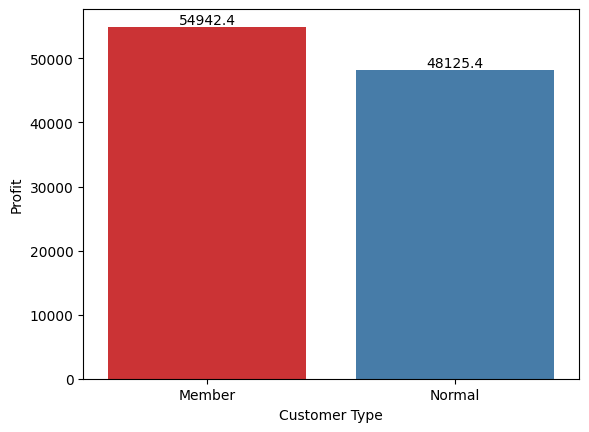

In [12]:
customer_by_profit  = df.groupby('customer_type')['profit'].sum().reset_index()


ax = sns.barplot(customer_by_profit,
                   x='customer_type',
                   y='profit',
                   hue='customer_type',
                   palette='Set1')

plt.xlabel('Customer Type')
plt.ylabel('Profit')

for p in ax.containers:
    ax.bar_label(p,label_type='edge')
plt.show()

In [13]:
product_category_sales_by_city = df.pivot_table(
    index = 'city',
    columns = 'product_category',
    values='total_sales',
    aggfunc='count'
)

fig = px.bar(
    product_category_sales_by_city,
    x=product_category_sales_by_city.index,
    y=product_category_sales_by_city.columns,
    title="Product Category Sales by City",
    barmode='group',
    labels={'city':'City','value':'Product Category'}
)

fig.show()

In [14]:
product_sales_by_city = df.pivot_table(
    index = 'city',
    columns = 'product_name',
    values='total_sales',
    aggfunc='count'
)

fig = px.bar(
    product_sales_by_city,
    x=product_sales_by_city.index,
    y=product_sales_by_city.columns,
    title="Product Sales by City",
    barmode='group',
    labels={'city':'City','value':'Product Name'}
)

fig.show()

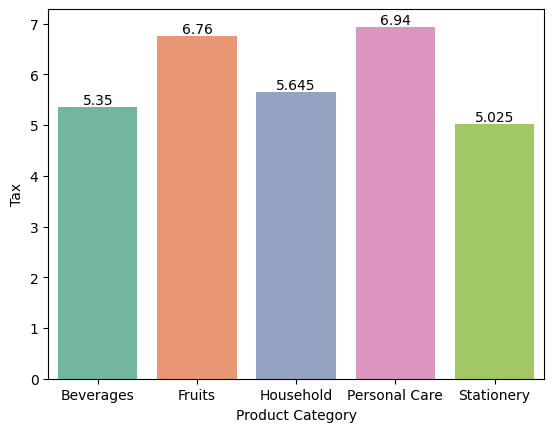

In [15]:
tax_on_products = df.groupby('product_category')['tax'].median().reset_index()

ax = sns.barplot(tax_on_products,
                   x='product_category',
                   y='tax',
                   hue='product_category',
                   palette='Set2')

plt.xlabel('Product Category')
plt.ylabel('Tax')

for p in ax.containers:
    ax.bar_label(p,label_type='edge')
plt.show()


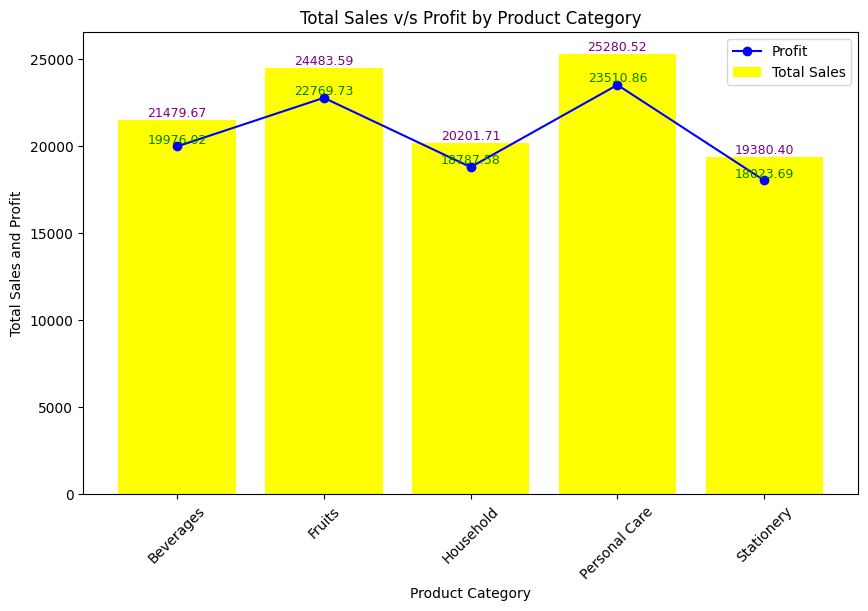

In [32]:
sales_profit_by_category = df.groupby('product_category')[['total_sales','profit']].sum()


plt.figure(figsize=(10,6))
plt.bar(sales_profit_by_category.index, sales_profit_by_category['total_sales'],color='yellow',label='Total Sales')
plt.plot(sales_profit_by_category.index, sales_profit_by_category['profit'],color='blue',label='Profit',marker='o')
plt.xlabel('Product Category')
plt.ylabel('Total Sales and Profit')
plt.legend()
plt.xticks(rotation=45)
plt.title('Total Sales v/s Profit by Product Category')

for i, value in enumerate(sales_profit_by_category['total_sales']):
    plt.text(sales_profit_by_category.index[i], value, f'{value:.2f}', color='purple', ha='center', va='bottom', fontsize=9)

for i, value in enumerate(sales_profit_by_category['profit']):
    plt.text(sales_profit_by_category.index[i], value, f'{value:.2f}', color='green', ha='center', va='bottom', fontsize=9)

plt.show()

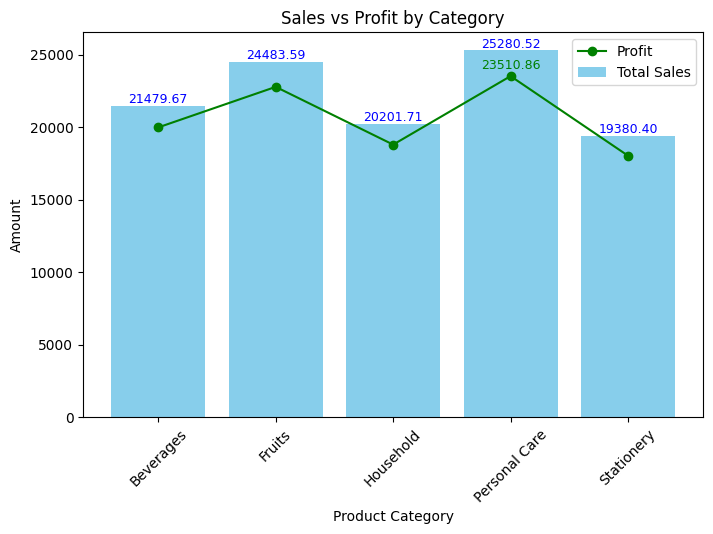

In [24]:
# Group by product category
sales_profit_by_category = df.groupby('product_category')[['total_sales', 'profit']].sum()

# Plot the graph
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_profit_by_category.index, sales_profit_by_category['total_sales'], 
               color='skyblue', label='Total Sales')
line = plt.plot(sales_profit_by_category.index, sales_profit_by_category['profit'], 
                color='green', marker='o', label='Profit')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.title('Sales vs Profit by Category')
plt.xticks(rotation=45)
plt.legend()

# Display values on bars and points
plt.bar_label(bars, fmt='%.2f', label_type='edge', color='blue', fontsize=9)
plt.annotate(f'{sales_profit_by_category["profit"].max():.2f}', 
             xy=(sales_profit_by_category['profit'].idxmax(), sales_profit_by_category['profit'].max()), 
             xytext=(0, 5), textcoords='offset points', color='green', fontsize=9, ha='center')

plt.show()


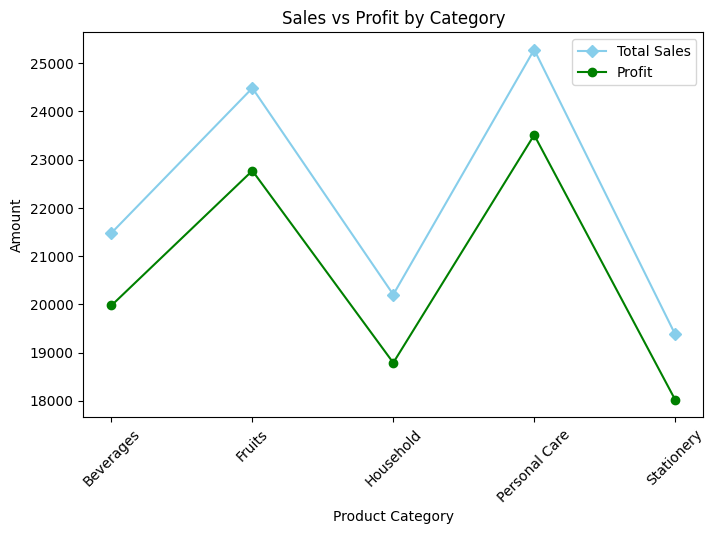

In [33]:
sales_profit_by_city = df.groupby('city')[['total_sales', 'profit']].sum()

plt.figure(figsize=(8, 5))
plt.plot(sales_profit_by_category.index, sales_profit_by_category['total_sales'], color='skyblue', label='Total Sales',marker='D')
plt.plot(sales_profit_by_category.index, sales_profit_by_category['profit'], color='green', marker='o', label='Profit')

plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.title('Sales vs Profit by Category')
plt.xticks(rotation=45)
plt.legend()

plt.show()
